In [1]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]

### Displaying Images

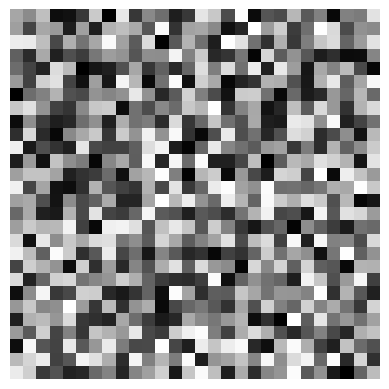

In [2]:
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

#### Matrix Multiplication

In [3]:
a = torch.tensor([[1, 1], [1, 0]])

print(a)
# tensor([[1, 1],
#         [1, 0]])

print(torch.matrix_power(a, 2))
# tensor([[2, 1],
#         [1, 1]])

print(torch.matrix_power(a, 3))
# tensor([[3, 2],
#         [2, 1]])

print(torch.matrix_power(a, 4))
# tensor([[5, 3],
#         [3, 2]])

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


### creating a MLP using pytorch

In [7]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.output_layer = nn.Linear(64, 10)
        self.activation = nn.ReLU()
        

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [8]:
model = MLP(input_size=10)

In [9]:
print(model)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
)


In [11]:
model.forward(torch.rand(10))

tensor([ 0.3397, -0.0646, -0.2697,  0.1078,  0.1690,  0.2410, -0.0229,  0.0333,
        -0.1507,  0.0854], grad_fn=<ViewBackward0>)

### PyTorch Loss Functions

**1.Cross entropy loss**

In [12]:
loss_function = nn.CrossEntropyLoss()
target = torch.tensor([0])
target

tensor([0])

In [13]:
prediction = torch.tensor([[2.0, 1.0, 0.1]])
loss = loss_function(prediction, target)
loss

tensor(0.4170)

**2.Mean Squared Error Loss**

In [16]:
loss_function  = nn.MSELoss()
# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) 

400000000.0


### PyTorch Optimizers

In [17]:
import torch.optim as optim

**1.Stochastic Gradient Descent (SGD)**

In [18]:
# momentum=0.9 smoothes out updates and can help training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

**2.Adam**

In [19]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

### PyTorch Datasets and Data Loaders

In [20]:
from torch.utils.data import Dataset, DataLoader
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.number = list(range(data_range[0], data_range[1]))
        
    def __len__(self):
        return len(self.number)
    
    def __getitem__(self, idx):
        X = self.number[idx]
        y = self.number[idx] +1
        return (X, y), y * X

In [26]:
dataset = NumberProductDataset(data_range=(0, 11))
print(len(dataset))

11


In [27]:
data_sample = dataset[3]
data_sample

((3, 4), 12)

In [34]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

In [36]:
for num_pair, product in dataloader:
    print(num_pair, product)

[tensor([8, 3, 9]), tensor([ 9,  4, 10])] tensor([72, 12, 90])
[tensor([ 4, 10,  7]), tensor([ 5, 11,  8])] tensor([ 20, 110,  56])
[tensor([0, 2, 1]), tensor([1, 3, 2])] tensor([0, 6, 2])
[tensor([5, 6]), tensor([6, 7])] tensor([30, 42])


### Create a Number Sum Dataset

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [43]:
class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.number = list(range(data_range[0], data_range[1]))
        
    def __len__(self):
        return len(self.number) **2
    
    def __getitem__(self, idx):
        X = float(self.number[idx//len(self.number)])
        y = float(self.number[idx % len(self.number)])
        return torch.tensor([X, y]), torch.tensor([y + X])

In [44]:
dataset = NumberSumDataset(data_range=(0, 100))

In [45]:
for i in range(5):
    print(dataset[i])

(tensor([0., 0.]), tensor([0.]))
(tensor([0., 1.]), tensor([1.]))
(tensor([0., 2.]), tensor([2.]))
(tensor([0., 3.]), tensor([3.]))
(tensor([0., 4.]), tensor([4.]))


### Define a Simple Model

In [48]:
class MLP(nn.Module):
  def __init__(self, input_size):
    super(MLP, self).__init__()
    self.hidden_layer = nn.Linear(input_size, 128)
    self.output_layer = nn.Linear(128, 1)
    self.activation = nn.ReLU()
  def forward(self, x):
    x = self.activation(self.hidden_layer(x))
    return self.output_layer(x)

In [52]:
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [55]:
for epoch in range(10):
  total_loss = 0
  for numberPair, sums in dataloader:
    prediction = model(numberPair)
    loss = loss_function(prediction, sums)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    total_loss += loss.item()
    

  print(f"Epoch {epoch}, loss: {total_loss}")

Epoch 0, loss: 20244.486399188638
Epoch 1, loss: 7.337549045681953
Epoch 2, loss: 3.4310268629342318
Epoch 3, loss: 1.542381074745208
Epoch 4, loss: 0.7958074840717018
Epoch 5, loss: 0.5091673338320106
Epoch 6, loss: 0.3914830033900216
Epoch 7, loss: 0.32944772334303707
Epoch 8, loss: 0.2414406215539202
Epoch 9, loss: 0.2198363235220313


### Test the model

In [56]:
model(torch.tensor([[1.0, 2.0]]))

tensor([[3.0309]], grad_fn=<AddmmBackward0>)